## Práctica 2: Descriptive Statistics

Realizar un análisis descriptivo, identificar las entidades y relaciones de los datos y crear un diagrama. Tambien obtener estadísticas de los datos agrupados por esas entidades.

### Lectura del csv

In [1]:
import os
import pandas as pd

df = pd.read_csv("datos_limpios.csv")

### Análisis estadistico descriptivo

Estadísticas descriptivas de los valores numericos y categoricos.

In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [28]:
print("Estadisticas descriptivas de los valores numericos\n")
print(df.describe(include='number'))
print("\n" + "="*50 + "\n")
print("\nEstadisticas descriptivas de los valores categoricos\n")
print(df.describe(include='object'))

Estadisticas descriptivas de los valores numericos

           Avg VTAT      Avg CTAT  Booking Value  Ride Distance  \
count  93000.000000  93000.000000   93000.000000   93000.000000   
mean       8.511878     30.034772     508.178215      26.000493   
std        3.748138      8.650707     396.058769      13.824176   
min        2.000000     15.000000      50.000000       2.000000   
25%        5.300000     22.600000     234.000000      14.100000   
50%        8.500000     30.000000     414.000000      26.020000   
75%       11.800000     37.500000     689.000000      37.942500   
max       15.000000     45.000000    4277.000000      50.000000   

       Driver Ratings  Customer Rating  
count    93000.000000     93000.000000  
mean         4.230992         4.404584  
std          0.436871         0.437819  
min          3.000000         3.000000  
25%          4.100000         4.200000  
50%          4.300000         4.500000  
75%          4.600000         4.800000  
max          5.0

Asimetria y kurtosis:

In [26]:
print("Asimetria de los valores numericos\n")
print(df.skew(numeric_only=True))
print("\n" + "="*50 + "\n")
print("\nKurtosis de los valores numericos\n")
print(df.kurtosis(numeric_only=True))

Asimetria de los valores numericos

Avg VTAT          -0.000465
Avg CTAT          -0.002455
Booking Value      2.300448
Ride Distance     -0.002405
Driver Ratings    -0.655715
Customer Rating   -0.885531
dtype: float64



Kurtosis de los valores numericos

Avg VTAT           -1.196893
Avg CTAT           -1.197333
Booking Value      10.006479
Ride Distance      -1.195916
Driver Ratings      0.280239
Customer Rating     0.647966
dtype: float64


Lo más notable del conjunto de datos sería el booking value que hace referencia al importe total del viaje, esto podría influir en los modelos estadisticos o machine learning.

### Identificación de las entidades y relaciones

Si checamos las columnas podremos ver las entidades que tendremos así como las relaciones.

In [19]:
df.columns

Index(['Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type',
       'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT',
       'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating',
       'Payment Method', 'Datetime'],
      dtype='object')

En este caso podemos ver que varias cosas se relacionan con el "Booking", si tomamos eso como entidad principal, entonces lo que es Booking ID, Booking Status, Booking Value, Ride Distance, Datetime, Pickup Location, Drop Location, Avg VTAT, Avg CTAT, Driver Ratings y Customer Ratings. Las siguientes entidades tendrían un identificador único, tenemos a Customers con Customer ID, Vehicles con Vehicle Type y Payments con Payment Method.

Las relaciones quedarían:
* Customer-Booking. Un customer hace una Booking
* Booking-Vehicle. Una booking utiliza un Vehicle
* Booking-Payments. Una booking se paga con un Payment Method

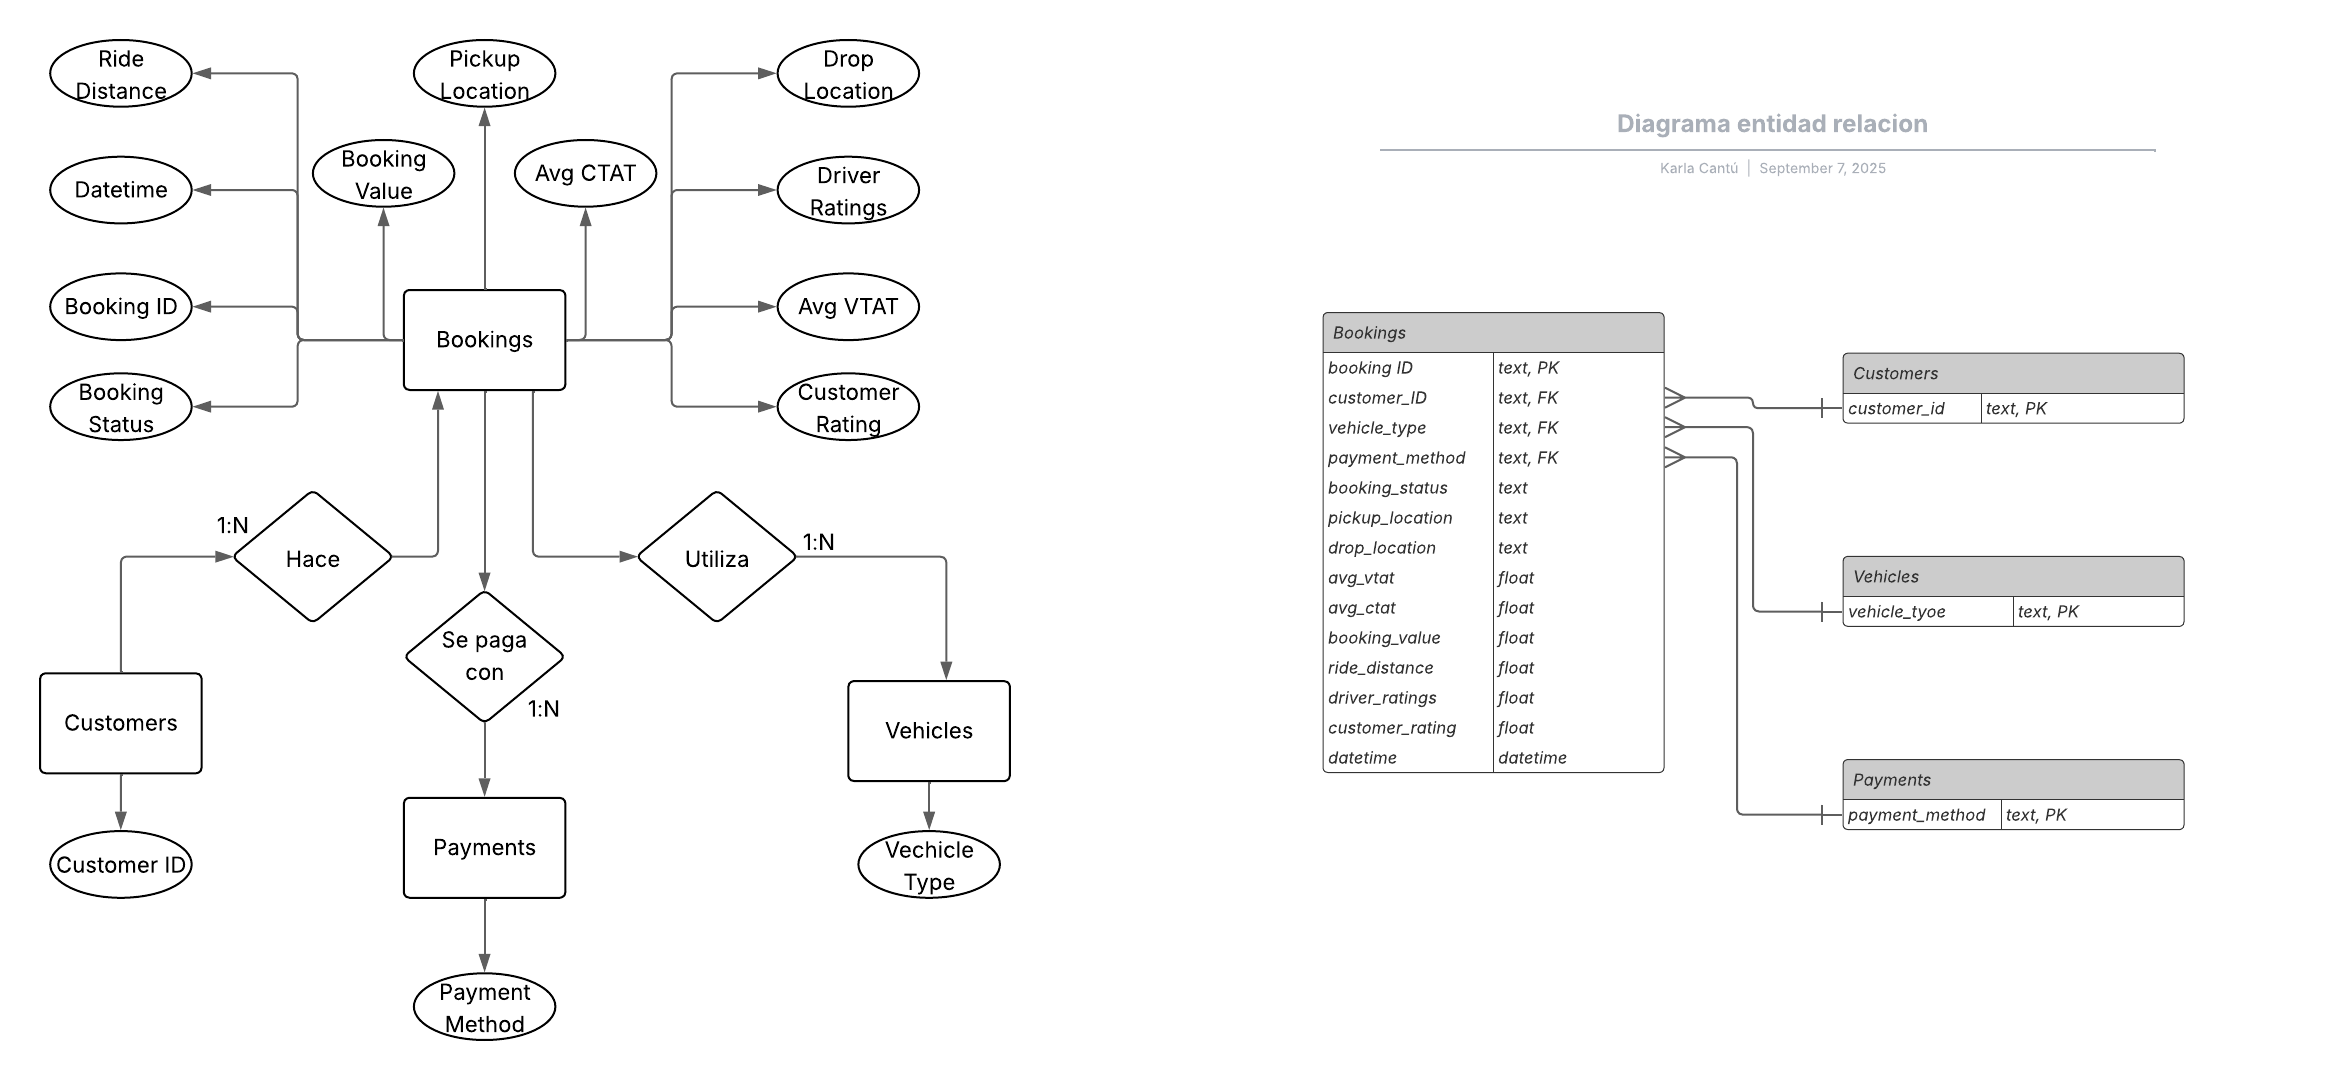

### Estadisticas agrupadas por entidades

Si agrupamos los datos segun las entidades, estos serían de la siguiente forma: agrupación por los clientes, agrupación por los vehiculos y agrupación por reservas. Si pensamos en booking, no tiene tanto sentido, ya que de esta tabla es de donde sacamos los datos por el cual agrupamos las otras entidades.

Con la agrupación por clientes vemos cuantas reservas ha hecho, cuanto ha gastado y la calificación promedio. Con la agrupación por vehiculos y pagos vemos que tipo de vehiculo es el más utilizado y que metodo de pago es el más utilizado.

In [30]:
customer_stats = df.groupby('Customer ID').agg(
    total_bookings=('Booking ID', 'count'),
    total_value=('Booking Value', 'sum'),
    avg_rating=('Customer Rating', 'mean')
).reset_index()

print("Estadísticas por Cliente:")
print(customer_stats.head())

print("\n" + "="*50 + "\n")

vehicle_stats = df.groupby('Vehicle Type').agg(
    total_bookings=('Booking ID', 'count'),
    avg_value=('Booking Value', 'mean'),
    avg_distance=('Ride Distance', 'mean')
).reset_index()

print("Estadísticas por Tipo de Vehículo:")
print(vehicle_stats)

print("\n" + "="*50 + "\n")

payment_stats = df.groupby('Payment Method').agg(
    total_bookings=('Booking ID', 'count'),
    avg_value=('Booking Value', 'mean')
).reset_index()

print("Estadísticas por Método de Pago:")
print(payment_stats)

Estadísticas por Cliente:
    Customer ID  total_bookings  total_value  avg_rating
0  "CID1000234"               1        458.0         4.3
1  "CID1000323"               1       1498.0         4.5
2  "CID1000448"               1        448.0         4.2
3  "CID1000469"               1        419.0         4.3
4  "CID1000588"               1        253.0         4.1


Estadísticas por Tipo de Vehículo:
    Vehicle Type  total_bookings   avg_value  avg_distance
0           Auto           23155  506.483049     25.989588
1           Bike           14034  509.114508     25.998760
2        Go Mini           18549  507.381422     25.989844
3       Go Sedan           16676  512.026865     25.977648
4  Premier Sedan           11252  509.567632     25.946155
5        Uber XL            2783  505.302192     25.723284
6          eBike            6551  503.458556     26.342151


Estadísticas por Método de Pago:
  Payment Method  total_bookings   avg_value
0           Cash           23114  508.61257